In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import netCDF4 as nc
from cartopy import crs
from cartopy.feature import NaturalEarthFeature
import wrf

In [5]:
def get_plot_element(infile):
    rootgroup = nc.Dataset(infile, 'r')
    p = wrf.getvar(rootgroup, 'LU_INDEX')
    #lats, lons = wrf.latlon_coords(p)
    cart_proj = wrf.get_cartopy(p)
    xlim = wrf.cartopy_xlim(p)
    ylim = wrf.cartopy_ylim(p)
    rootgroup.close()
    return cart_proj, xlim, ylim

Text(-3105000.309166264, 2039999.3684292915, 'D01')

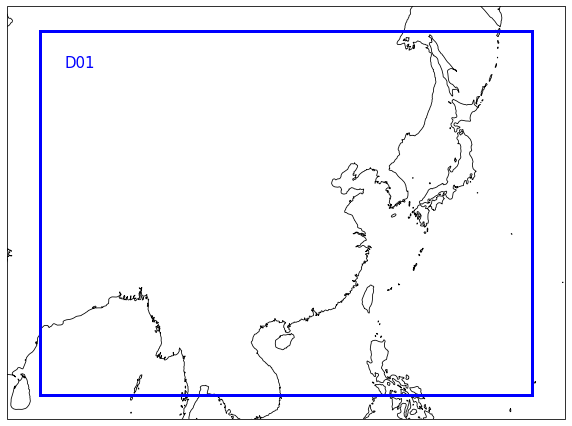

In [7]:
infile_d01 = ('/mnt/e/wrf_tibet/test/2000.01/wrfinput_d01')
cart_proj, xlim_d01, ylim_d01 = get_plot_element(infile_d01)

# infile_d02 = 'domain_plot/wrfout_d02.2010-05-01_00:00:00.nc'
# _, xlim_d02, ylim_d02 = get_plot_element(infile_d02)
 
# infile_d03 = 'domain_plot/wrfout_d03.2010-05-01_00:00:00.nc'
# _, xlim_d03, ylim_d03 = get_plot_element(infile_d03)
 
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=cart_proj)
 
states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                             name='admin_1_states_provinces_shp')
ax.add_feature(states, linewidth=0.5)
ax.coastlines('50m', linewidth=0.8)

# d01
ax.set_xlim([xlim_d01[0]-(xlim_d01[1]-xlim_d01[0])/15, xlim_d01[1]+(xlim_d01[1]-xlim_d01[0])/15])
ax.set_ylim([ylim_d01[0]-(ylim_d01[1]-ylim_d01[0])/15, ylim_d01[1]+(ylim_d01[1]-ylim_d01[0])/15])
 
# d01 box
ax.add_patch(mpl.patches.Rectangle((xlim_d01[0], ylim_d01[0]), xlim_d01[1]-xlim_d01[0], ylim_d01[1]-ylim_d01[0],
             fill=None, lw=3, edgecolor='blue', zorder=10))
ax.text(xlim_d01[0]+(xlim_d01[1]-xlim_d01[0])*0.05, ylim_d01[0]+(ylim_d01[1]-ylim_d01[0])*0.9, 'D01',
        size=15, color='blue', zorder=10)

In [9]:
import salem

KeyboardInterrupt: 